In [1]:
from matplotlib import pyplot as plt

In [2]:
from pycbc import waveform
from pycbc.waveform import get_fd_waveform
import numpy as np

In [3]:
par = {'mass1':50,
      'mass2':50,
      'spin1z':0,
      'spin2z':0.9,
      'delta_f':1/16,
      'distance':100,
      'f_lower':20}

lambda_g = 1e16
gr_approx = 'SEOBNRv5_ROM'
dchi2 = -1

# GR
hp, _ = get_fd_waveform(approximant=gr_approx,
                                 **par)
# massive graviton
hp_mg, _ = get_fd_waveform(approximant='massivegraviton',
                           baseapprox = gr_approx,
                           lambda_g = lambda_g,
                           **par)
# FTA
hp_fta, _ = get_fd_waveform(approximant='fta',
                           baseapprox = gr_approx,
                           ftadchi2 = dchi2,
                           **par)

Text(0, 0.5, 'Real h+(f)')

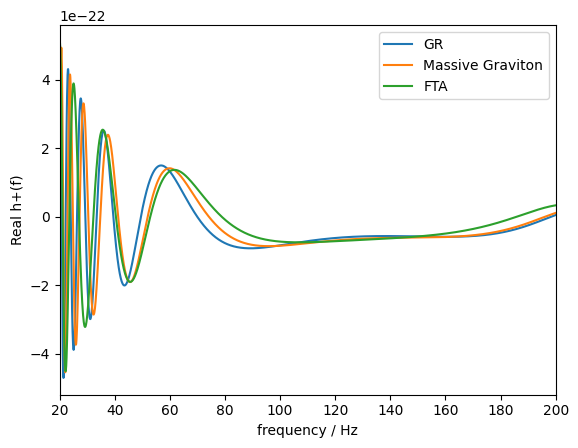

In [7]:
plt.plot(hp.sample_frequencies,hp,label='GR')
plt.plot(hp_mg.sample_frequencies,hp_mg,label='Massive Graviton')
plt.plot(hp_fta.sample_frequencies,hp_fta,label='FTA')
plt.xlim(20,200)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')